In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
!dir
#ls for unix

 Volume in drive C is Windows
 Volume Serial Number is FCA0-F42E

 Directory of C:\workspace\DataScience

13.05.2015  10:03    <DIR>          .
13.05.2015  10:03    <DIR>          ..
13.05.2015  10:03    <DIR>          .ipynb_checkpoints
11.05.2015  15:39               382 .project
11.05.2015  15:39               431 .pydevproject
11.05.2015  15:39    <DIR>          cs109
13.05.2015  10:03               933 lab3.ipynb
               3 File(s)          1.746 bytes
               4 Dir(s)  251.124.584.448 bytes free


In [8]:
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [9]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

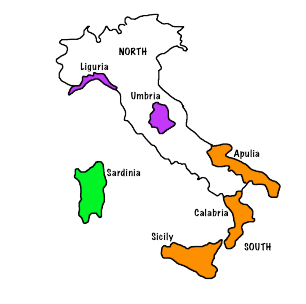

In [2]:
from IPython.display import Image
Image(filename='Italy.png')

In [6]:
df=pd.read_csv("data/olive.csv")
df.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [8]:
print df.columns
df.rename(columns={df.columns[0]:'areastring'}, inplace=True)
df.columns

Index([u'Unnamed: 0', u'region', u'area', u'palmitic', u'palmitoleic',
       u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic',
       u'eicosenoic'],
      dtype='object')


Index([u'areastring', u'region', u'area', u'palmitic', u'palmitoleic',
       u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic',
       u'eicosenoic'],
      dtype='object')

In [10]:
print 'regions\t', df.region.unique()
print 'areas\t', df.area.unique()

regions	[1 2 3]
areas	[1 2 3 4 5 6 9 7 8]


In [11]:
pd.crosstab(df.area, df.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [12]:
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [14]:
df.areastring = df.areastring.map(lambda x: x.split('.')[-1])
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [15]:
df[['palmitic','oleic']].head()

,palmitic,oleic
0,1075,7823
1,1088,7709
2,911,8113
3,966,7952
4,1051,7771


In [16]:
print df['palmitic']

0      1075
1      1088
2       911
3       966
4      1051
5       911
6       922
7      1100
8      1082
9      1037
10     1051
11     1036
12     1074
13      875
14      952
15     1155
16      943
17     1278
18      961
19      952
20     1074
21      995
22     1056
23     1065
24     1065
25     1315
26     1321
27     1359
28     1378
29     1295
       ... 
542    1020
543     970
544    1180
545    1060
546     990
547    1010
548    1040
549    1040
550    1020
551    1020
552    1010
553     920
554    1030
555     960
556    1030
557    1010
558    1020
559    1120
560    1090
561    1100
562    1090
563    1150
564    1110
565    1010
566    1070
567    1280
568    1060
569    1010
570     990
571     960
Name: palmitic, dtype: int64


In [17]:
print "type of df[['palmitic']]:\t", type(df[['palmitic']]) 
print "type of df['palmitic']:\t\t", type(df['palmitic'])

type of df[['palmitic']]:	<class 'pandas.core.frame.DataFrame'>
type of df['palmitic']:		<class 'pandas.core.series.Series'>


In [18]:
df.palmitic

0      1075
1      1088
2       911
3       966
4      1051
5       911
6       922
7      1100
8      1082
9      1037
10     1051
11     1036
12     1074
13      875
14      952
15     1155
16      943
17     1278
18      961
19      952
20     1074
21      995
22     1056
23     1065
24     1065
25     1315
26     1321
27     1359
28     1378
29     1295
       ... 
542    1020
543     970
544    1180
545    1060
546     990
547    1010
548    1040
549    1040
550    1020
551    1020
552    1010
553     920
554    1030
555     960
556    1030
557    1010
558    1020
559    1120
560    1090
561    1100
562    1090
563    1150
564    1110
565    1010
566    1070
567    1280
568    1060
569    1010
570     990
571     960
Name: palmitic, dtype: int64

In [19]:
df.areastring.unique()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

In [20]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

In [47]:
dfsub = df[acidlist].apply(lambda x: x/100)
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


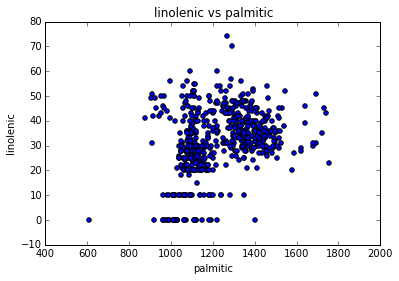

In [25]:
fig=plt.figure()
plt.scatter(df.palmitic, df.linolenic)
axis = fig.gca() #get current axis
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')
#fig can be got with fig.gcf()

(array([   1.,    0.,   11.,   71.,  188.,   79.,  131.,   73.,    9.,    9.]),
 array([  610. ,   724.3,   838.6,   952.9,  1067.2,  1181.5,  1295.8,
         1410.1,  1524.4,  1638.7,  1753. ]),
 <a list of 10 Patch objects>)

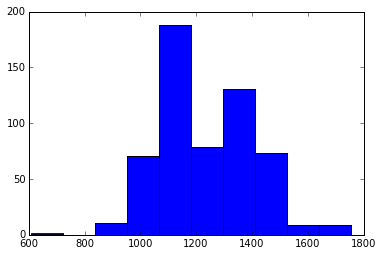

In [26]:
plt.hist(df.palmitic)

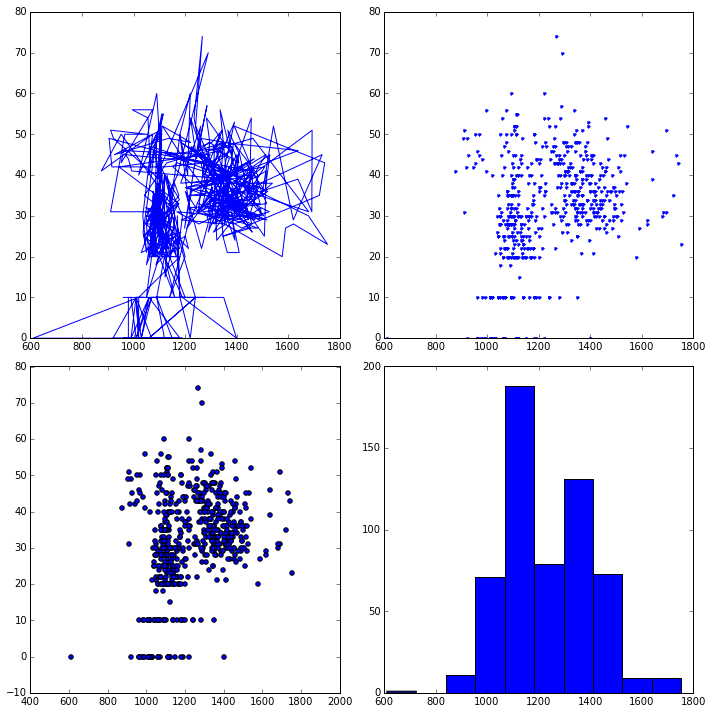

In [27]:
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(df.palmitic, df.linolenic)
axes[0][1].plot(df.palmitic, df.linolenic, '.')
axes[1][0].scatter(df.palmitic, df.linolenic)
axes[1][1].hist(df.palmitic)
fig.tight_layout()

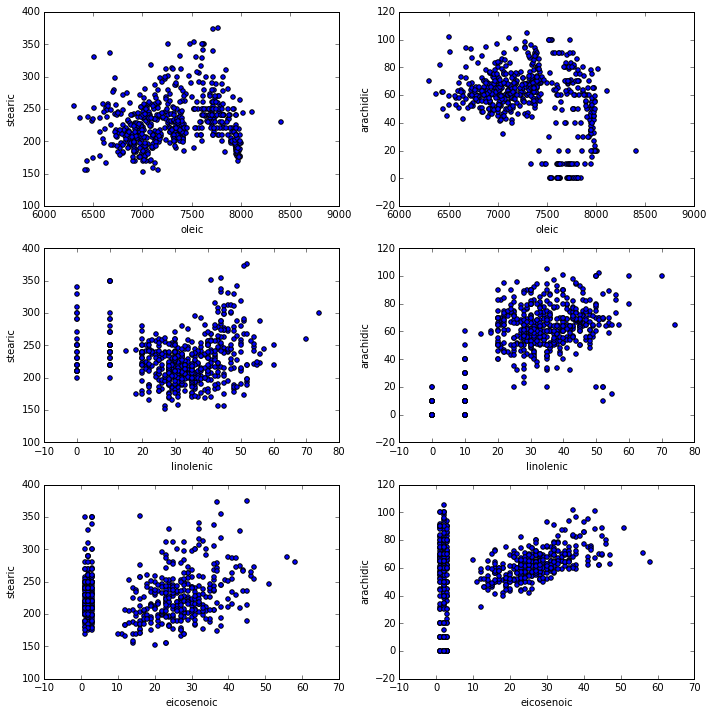

In [53]:
xacids=['oleic','linolenic','eicosenoic']
yacids=['stearic','arachidic']
rowsCount = len(xacids)
colsCount = len(yacids)
fig, axes=plt.subplots(figsize=(10,10), nrows=rowsCount, ncols=colsCount)
for i, xacid in enumerate(xacids):
    for j, yacid in enumerate(yacids):
        axes[i][j].scatter(df[xacid], df[yacid])
        axes[i][j].set_xlabel(xacid)
        axes[i][j].set_ylabel(yacid)
fig.tight_layout()

In [58]:
region_groupby = df.groupby('region')
print type(region_groupby)
region_groupby.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46
323,Inland-Sardinia,2,5,1129,120,222,7272,1112,43,98,2
324,Inland-Sardinia,2,5,1042,135,210,7376,1116,35,90,3
325,Inland-Sardinia,2,5,1103,96,210,7380,1085,32,94,3
326,Inland-Sardinia,2,5,1118,97,221,7279,1154,35,94,2
327,Inland-Sardinia,2,5,1052,95,215,7388,1126,31,92,1


In [31]:
for key, value in region_groupby:
    print "( key, type(value) ) = (", key, ",", type(value), ")"
    v=value

v.head()

( key, type(value) ) = ( 1 , <class 'pandas.core.frame.DataFrame'> )
( key, type(value) ) = ( 2 , <class 'pandas.core.frame.DataFrame'> )
( key, type(value) ) = ( 3 , <class 'pandas.core.frame.DataFrame'> )


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
421,Umbria,3,9,1085,70,180,7955,605,20,50,1
422,Umbria,3,9,1085,70,185,7955,600,25,55,1
423,Umbria,3,9,1090,60,190,7950,600,28,47,2
424,Umbria,3,9,1080,65,189,7960,602,35,20,1
425,Umbria,3,9,1090,60,195,7955,600,28,42,2


In [60]:
region_groupby.describe()

region        area     palmitic  palmitoleic     stearic  \
region                                                                   
1      count     323  323.000000   323.000000   323.000000  323.000000   
       mean        1    2.783282  1332.287926   154.801858  228.773994   
       std         0    0.741054   152.934872    50.723686   39.870851   
       min         1    1.000000   875.000000    35.000000  152.000000   
       25%         1    2.500000  1268.000000   121.500000  201.500000   
       50%         1    3.000000  1346.000000   163.000000  223.000000   
       75%         1    3.000000  1419.000000   185.000000  249.500000   
       max         1    4.000000  1753.000000   280.000000  375.000000   
2      count      98   98.000000    98.000000    98.000000   98.000000   
       mean        2    5.336735  1111.346939    96.744898  226.183673   
       std         0    0.475023    40.411059    13.851429   17.636272   
       min         2    5.000000  1030.000000    35.000000  199.000000   
       25%         2    5.000000  1085.250000    88.250000  212.000000   
       50%         2    5.000000  1107.500000    96.000000  222.000000   
       75%         2    6.000000  1137.250000   104.000000  239.500000   
       max         2    6.000000  1213.000000   135.000000  272.000000   
3      count     151  151.000000   151.000000   151.000000  151.000000   
       mean        3    8.006623  1094.801325    83.735099  230.801325   
       std         0    0.820542    82.563513    26.438785   38.956047   
       min         3    7.000000   610.000000    15.000000  170.000000   
       25%         3    7.000000  1060.000000    69.000000  200.000000   
       50%         3    8.000000  1090.000000    80.000000  230.000000   
       75%         3    9.000000  1125.000000   100.000000  250.000000   
       max         3    9.000000  1400.000000   180.000000  350.000000   

                    oleic     linoleic   linolenic   arachidic  eicosenoic  
region                                                                      
1      count   323.000000   323.000000  323.000000  323.000000  323.000000  
       mean   7100.009288  1033.498452   38.065015   63.117647   27.321981  
       std     345.143066   210.673018    7.972709   11.164430    8.391528  
       min    6300.000000   448.000000   20.000000   32.000000   10.000000  
       25%    6883.000000   855.500000   32.000000   56.000000   22.000000  
       50%    7030.000000  1090.000000   37.000000   62.000000   27.000000  
       75%    7283.500000  1202.500000   44.000000   69.000000   32.000000  
       max    8113.000000  1462.000000   74.000000  102.000000   58.000000  
2      count    98.000000    98.000000   98.000000   98.000000   98.000000  
       mean   7268.020408  1196.530612   27.091837   73.173469    1.938776  
       std     141.878268   107.233554    5.384374   11.882609    0.743582  
       min    6882.000000  1057.000000   15.000000   45.000000    1.000000  
       25%    7137.250000  1112.250000   23.000000   66.000000    1.000000  
       50%    7325.500000  1146.500000   27.000000   72.000000    2.000000  
       75%    7381.000000  1306.500000   30.000000   81.000000    2.000000  
       max    7439.000000  1470.000000   43.000000  105.000000    3.000000  
3      count   151.000000   151.000000  151.000000  151.000000  151.000000  
       mean   7793.052980   727.033113   21.788079   37.576159    1.973510  
       std     164.815525   143.122578   16.886527   29.358573    0.729813  
       min    7340.000000   510.000000    0.000000    0.000000    1.000000  
       25%    7680.000000   602.000000   10.000000   10.000000    1.000000  
       50%    7800.000000   680.000000   20.000000   38.000000    2.000000  
       75%    7950.000000   825.000000   35.000000   59.500000    2.500000  
       max    8410.000000  1050.000000   70.000000  100.000000    3.000000

In [32]:
dfbystd=df.groupby('region').std()
dfbystd.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,152.934872,50.723686,39.870851,345.143066,210.673018,7.972709,11.164430,8.391528
2,0.475023,40.411059,13.851429,17.636272,141.878268,107.233554,5.384374,11.882609,0.743582
3,0.820542,82.563513,26.438785,38.956047,164.815525,143.122578,16.886527,29.358573,0.729813


In [33]:
dfbymean=region_groupby.aggregate(np.mean)
dfbymean.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981
2,5.336735,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
3,8.006623,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510


In [34]:
region_groupby.aggregate(lambda x: x.palmitic.sum())

,areastring,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,430329,430329,430329,430329,430329,430329,430329,430329,430329,430329
2,108912,108912,108912,108912,108912,108912,108912,108912,108912,108912
3,165315,165315,165315,165315,165315,165315,165315,165315,165315,165315


In [35]:
region_groupby.apply(lambda f: f.mean())

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1,2.783282,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981
2,2,5.336735,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
3,3,8.006623,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510


In [36]:
region_groupby.apply(lambda f: f.palmitic.mean())

region
1    1332.287926
2    1111.346939
3    1094.801325
dtype: float64

In [37]:
renamedict_std={k:k+"_std" for k in acidlist}
renamedict_mean={k:k+"_mean" for k in acidlist}
dfbystd.rename(inplace=True, columns=renamedict_std)
dfbymean.rename(inplace=True, columns=renamedict_mean) 
dfbystd.head()

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,152.934872,50.723686,39.870851,345.143066,210.673018,7.972709,11.164430,8.391528
2,0.475023,40.411059,13.851429,17.636272,141.878268,107.233554,5.384374,11.882609,0.743582
3,0.820542,82.563513,26.438785,38.956047,164.815525,143.122578,16.886527,29.358573,0.729813


In [38]:
df.shape

(572, 11)

In [61]:
dfpalmiticmean=dfbymean[['palmitic_mean']]
dfpalmiticstd=dfbystd[['palmitic_std']]
otherdf['weight'] = weights


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Join smallerdf and otherdf on the index, into smallerdf

In [62]:
newdfbyregion = dfpalmiticmean.join(dfpalmiticstd)
newdfbyregion.head()

,palmitic_mean,palmitic_std
region,,
1,1332.287926,152.934872
2,1111.346939,40.411059
3,1094.801325,82.563513


In [69]:
mask =(dfbystd.oleic_std < 200)
mask
np.sum(mask), np.mean(mask)

(2, 0.66666666666666663)

In [70]:
weights=np.random.uniform(size=df.shape[0])
smallerdf=df[['palmitic']]
otherdf=df[['region']]
otherdf['weight'] = weights
otherdf.head()

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,region,weight
0,1,0.162729
1,1,0.649715
2,1,0.487010
3,1,0.726507
4,1,0.215513


In [73]:
smallerdf = smallerdf.join(otherdf)
smallerdf.head()

,palmitic,region,weight
0,1075,1,0.162729
1,1088,1,0.649715
2,911,1,0.487010
3,966,1,0.726507
4,1051,1,0.215513


In [80]:
def weight(f):
    return np.sum(f.weight*f.palmitic)/f.weight.sum()

smallerdf.groupby('region').apply(weight)

region
1    1338.181884
2    1110.981325
3    1096.206948
dtype: float64